In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
import os
path = os.getcwd()
path

'/home/enzo/Documents/thebrazilianshackathon'

In [3]:
df = pd.read_csv('./US/nmurx_us_19Q1.csv')

df['STATUS'] = df['STATUS'].div(3)
state = df.groupby('DEM_STATE').sum()
state.sort_values('DEM_STATE')

# removing alaska and hawaii
state = state.drop(['AK', 'HI'], axis = 0)
state.head()

,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_POSTAL,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,DEM_LIMIT,...,ILLXCAN_YR,ILLXCAN_NTY,ILLXCAN_MNTH,ILLXCAN_WK,ILL_USE,ILL_YR,ILL_NTY,ILL_MNTH,ILL_WK,WT
DEM_STATE,,,,,,,,,,,,,,,,,,,,,
AL,401.0,401,628,20204,142140,1203,1082,1011,1308,120,...,26,14,7,2,163,63,49,40,33,3.545241e+06
AR,250.0,250,397,12797,180819,750,616,629,811,77,...,11,10,7,6,106,44,34,24,17,2.087063e+06
AZ,837.0,844,1318,45258,714818,3348,2358,2020,2806,235,...,53,39,26,22,402,174,146,126,104,6.901520e+06
CA,2926.0,2965,4381,145615,2719254,11704,8939,7477,9972,707,...,199,146,105,62,1535,865,732,597,448,2.671154e+07
CO,532.0,536,845,28033,428309,2128,1566,1366,1792,135,...,31,19,15,9,276,138,123,109,89,4.617563e+06


In [24]:
# creating a df for pain relief drugs
state_sed = state[['STATUS','SED_NMU']]
state_sed['USE_PERCENTAGE'] = state_sed['SED_NMU']/state_sed['STATUS']

# creating a df for illicit drugs
state_stim = state[['STATUS','STIM_NMU']]
state_stim['USE_PERCENTAGE'] = state_stim['STIM_NMU']/state_stim['STATUS']

# creating a df for illicit drugs except cannabis
state_gaba = state[['STATUS','GABA_NMU']]
state_gaba['USE_PERCENTAGE'] = state_gaba['GABA_NMU']/state_gaba['STATUS']

<ipython-input-24-f8ba87ca58f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_sed['USE_PERCENTAGE'] = state_sed['SED_NMU']/state_sed['STATUS']
<ipython-input-24-f8ba87ca58f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_stim['USE_PERCENTAGE'] = state_stim['STIM_NMU']/state_stim['STATUS']
<ipython-input-24-f8ba87ca58f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [25]:
usa = gpd.read_file('./states/cb_2018_us_state_20m.shp')
usa = usa.to_crs("EPSG:3395")

# removing alaska, hawaii, and puerto rico
usa = usa.drop([7, 25, 48], axis = 0)
usa = usa.sort_values('STUSPS')
usa = usa.set_index('STUSPS')

# add variables to geopandas map
usa['SED_NMU_PERCENTAGE'] = state_sed['USE_PERCENTAGE']
usa['STIM_NMU_PERCENTAGE'] = state_stim['USE_PERCENTAGE']
usa['GABA_NMU_PERCENTAGE'] = state_gaba['USE_PERCENTAGE']

# changing the order to move geometry to the end
cols = usa.columns.tolist()
cols = cols[:-2] + cols[-1:] + [cols[-2]]
usa = usa[cols]

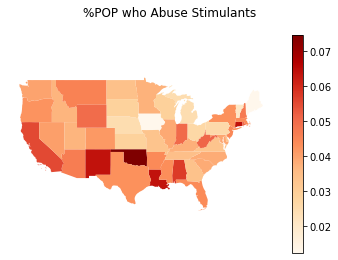

In [36]:
f, ax = plt.subplots(1)
ax.set_axis_off()
f.suptitle('%POP who Abuse Stimulants')
#usa.plot(ax=ax, cmap = 'OrRd', figsize=(10, 5), column = 'SED_NMU_PERCENTAGE', legend=True)
usa.plot(ax=ax, cmap = 'OrRd', figsize=(10, 5), column = 'STIM_NMU_PERCENTAGE', legend=True)
#usa.plot(ax=ax, cmap = 'OrRd', figsize=(10, 5), column = 'GABA_NMU_PERCENTAGE', legend=True)

plt.savefig('usa_map_STIM_NMU_PERCENTAGE.png')